In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
X = boston.data
y = boston.target

### Kfold
* 학습데이터를 K번 나누어서 train과 test로 구별하여 학습
* K개의 학습데이터를 K번 훈련시킨다.

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))    

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


### kfold validation 적용해보기

In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.4680988378011, 34.13523528291732)

### cross_val_score : scoring -> 높을수록좋음 , neg 붙임

In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.4680988378011, -34.13523528291732)

#### cross_validate : cross_val_score와 같으나 여러가지 지표를 리턴한다

In [6]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

C:\Users\maerad7\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\maerad7\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00099921, 0.0010004 , 0.00099874, 0.0010004 , 0.00100088,
        0.        , 0.0010004 , 0.00099897, 0.0010004 , 0.0009985 ]),
 'score_time': array([0.00099945, 0.        , 0.00100064, 0.        , 0.        ,
        0.00099945, 0.        , 0.        , 0.00099897, 0.00099897]),
 'test_neg_mean_squared_error': array([ -11.76550876,  -17.88254102,  -10.52975553,  -60.79007952,
         -46.7759819 ,  -40.76705647,  -17.313559  , -102.67749124,
         -22.86943714,  -13.30957779]),
 'train_neg_mean_squared_error': array([-28.25867446, -28.09877093, -28.29544619, -25.60605534,
        -26.94590404, -27.99625629, -28.41840338, -16.87943445,
        -26.20686855, -27.77076728]),
 'test_r2': array([ 0.66270514,  0.33413794, -0.50110792,  0.38037366,  0.33641058,
         0.45825049, -0.082118  ,  0.3113827 , -0.21342225,  0.29440448]),
 'train_r2': array([0.68408428, 0.68943221, 0.68778806, 0.65139783, 0.67380667,
        0.62984201, 0.69064928, 0.77241748, 0.68011836

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.774253982603973, -24.382147309697793)

#### 성능 별로임

In [8]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [10]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.41138591638757, -23.867078861847233)

In [11]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

#### ridge가 에러율도 적고 변화도 적다

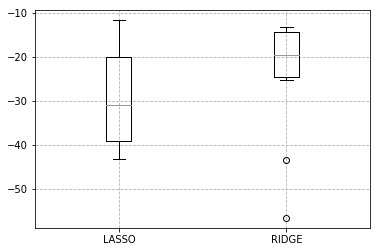

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [13]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### Scale

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

### Model Update
* warm_start : 이전에 사용한 가중치를 사용한다
* 그러므로 warm_start를 사용하면 모델을 업데이트 할 수 있다.
* 하지만 Linear regression에서만 가능하다.

In [15]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)    

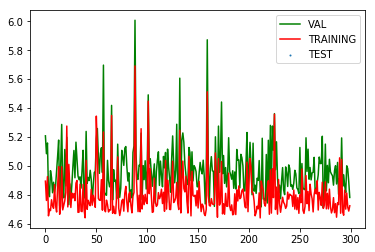

In [16]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [17]:
np.argsort(rmse_val_score)

array([273, 212, 166,  14, 199,  23, 157, 108, 218,  46, 119, 161,  83,
       216,  66,  25,  95, 130, 214,  70, 231, 215,  38,  85,  18, 299,
        73,   4, 169,  60, 203, 251, 235,  59, 288, 133, 249, 207, 265,
       229,   7, 295,  58, 123,   9, 266,   3, 205, 196, 131, 276, 195,
       211, 234,  84, 255, 248, 254, 243,  99, 187, 274,  39, 185,  74,
       220,  35, 191, 247, 253, 178, 150,  63, 115,  17, 149, 238, 292,
       105, 241,  20, 294, 112,  10, 206, 283, 230, 222, 242,  47, 139,
        26, 286,  24, 176,  41, 290, 244, 127, 278, 267,  22,   8,  64,
       298,  68, 140,  81, 145, 232, 143,  72,  43,  62, 209,  69, 168,
       261,  97,  33,  45,  91, 259, 183,  90, 289, 208, 228, 122,  29,
         6,  42,  34, 158,  32, 156, 282, 106, 138, 114, 293, 268, 182,
       179, 281, 246, 154, 174,  53, 151, 237, 262,  82,  56,  48, 263,
       171, 104, 186, 109, 280, 148, 257, 181,  49, 165,  11, 164, 184,
         5, 284, 100, 128, 245,  44, 153,  36, 226,  67, 297, 24

In [18]:
rmse(y_test,sgd_regressor.predict(X_test))

4.930429271155754

In [19]:
rmse(y_test,model_list[217].predict(X_test))

5.245541767874684

In [20]:
model_list[0].coef_

array([-0.83333236,  0.87046242,  0.29878993,  1.9807899 , -1.98829266,
        3.48406177,  0.25307471, -3.40289347,  2.04493912, -1.3276058 ,
       -2.3113357 ,  1.61862879, -3.4405526 ])